# Contents
[1- day-1](#day-1)\
[2- day-2](#day-2)

# ***Day-1***

* **Pipeline**

* **Import libraries & load dataset from sklearn**

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

* **Without Pipeline**

* Defining X & y

In [2]:
X,y = load_boston(return_X_y=True)

* Applying StandardScaler

In [3]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

* Applying Model

In [4]:
lr = LinearRegression()
lr.fit(scaled_X, y)

LinearRegression()

* Prediction & finding error

In [5]:
pred_y = lr.predict(scaled_X)
print('Mean Squared Error is:' , mean_squared_error(y, pred_y))

Mean Squared Error is: 21.894831181729202


* Plotting the results

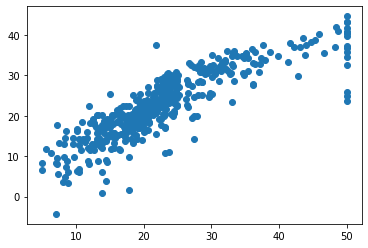

In [6]:
plt.scatter(y, pred_y)

* **With Pipeline**

* **Import libraries & load dataset from sklearn**

* **Assignments**
1. Difference between Pipeline and make_pipline with code and in markdown.
2. Difference between Grid Search CV and Randomized search CV.
3. Report about videos in a single or different files.

* **Solutions**

* **Pipeline VS make_pipeline:**

* **Markdown**
- **Pipeline:** Pipeline of transforms with a final estimator.
- **make_pipeline:** Construct a Pipeline from the given estimators. This is a shorthand for the Pipeline constructor.
- in **Pipeline** names are explicit, we don't have to figure them out if we need them;
- while in **make_pipeline** names are auto-generated using a straightforward rule (lowercase name of an estimator).
- **make_pipeline** is used for quick experiments and **Pipeline** for more stable code; a rule of thumb: **IPython Notebook -> make_pipeline**; **Python module in a larger project -> Pipeline**. But it is certainly not a big deal to use **make_pipeline** in a module or **Pipeline** in a short script or a notebook.

* **Code**

* **Import libraries & load_dataset**

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

* **Code for Pipeline**

In [2]:
# Splitting the data
X,y = load_boston(return_X_y=True)

In [3]:
# Creating the Pipeline
pipe = Pipeline([('scaler:',StandardScaler()),('algo:',KNeighborsRegressor())])

In [4]:
# Fitting the Pipeline
pipe.fit(X,y)

Pipeline(steps=[('scaler:', StandardScaler()),
                ('algo:', KNeighborsRegressor())])

* **Code for make_pipeline**

In [5]:
make_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [6]:
make_pipe.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

* ***Conclusion***
- As we can see that when we used **Pipeline** we give names to both "StandardScaler" & "LinearRegression" as "scaler" & " "algo"
respectively.
- But when we use **make_pipeline** we don't assign any name but given automatically by **make_pipeline function**.

* **Grid_Search CV & Randomized_Search CV:**

* **Markdown**

- The **GridSearchCV** exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter.
    - The **GridSearchCV** instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.
- **RandomizedSearchCV** implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:
    - A budget can be chosen independent of the number of parameters and possible values.
    - Adding parameters that do not influence the performance does not decrease efficiency.


* **Code**

In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

* ***Code for GridSearch CV**

In [8]:
pipe.get_params()
model = GridSearchCV(
            estimator=pipe,
            param_grid={'__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
            cv=5
            )

* **Code for RandomizesSearch CV**

In [9]:
pipe.get_params()
distributions = {'algo:__algorithm': 'auto',
                'algo:__leaf_size': 30,
                'algo:__metric': 'minkowski',
                'algo:__metric_params': None,
                'algo:__n_jobs': None,
                'algo:__n_neighbors': [1, 20],
                'algo:__p': 2,
                'algo:__weights': 'uniform'}
model = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=distributions
            )

* ***Conclusion***
- As above example illustrate that in **Grid Search CV** we have to assign one or more **hyperparameters** which we already know that they would work best.
- But in **Randomized Search CV** we give all the available **hyperparameters** and the function find the best ones for us by randomly assigning them.

* **3- Report about Videos**

* ***Video-1***
* **Model grid search CV in sk-learn**

* **Import libraries & load dataset from sklearn**

In [10]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

* **Splitting data**

In [11]:
X,y = load_boston(return_X_y=True)

* **Making Pipeline**

In [12]:
pipe = Pipeline([
                ('scaler:', StandardScaler()),
                ('algo:', KNeighborsRegressor())])

* **Note the hyperparameters**

In [13]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler:', StandardScaler()), ('algo:', KNeighborsRegressor())],
 'verbose': False,
 'scaler:': StandardScaler(),
 'algo:': KNeighborsRegressor(),
 'scaler:__copy': True,
 'scaler:__with_mean': True,
 'scaler:__with_std': True,
 'algo:__algorithm': 'auto',
 'algo:__leaf_size': 30,
 'algo:__metric': 'minkowski',
 'algo:__metric_params': None,
 'algo:__n_jobs': None,
 'algo:__n_neighbors': 5,
 'algo:__p': 2,
 'algo:__weights': 'uniform'}

* **Apply Grid Search CV**

In [14]:
model = GridSearchCV(
            estimator=pipe,
            param_grid={'algo:__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}, # in this function we use diff hyperparameters
            cv=5 # this function is used to make different chunks of dataset for train_test_split
            )

* **Fit the Model**

In [15]:
model.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler:', StandardScaler()),
                                       ('algo:', KNeighborsRegressor())]),
             param_grid={'algo:__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

* **Predictions**

In [16]:
model.predict(X)

array([25.96666667, 23.02222222, 32.57777778, 28.26666667, 30.42222222,
       26.51111111, 21.63333333, 19.31111111, 18.63333333, 20.16666667,
       19.31111111, 20.6       , 20.85555556, 19.2       , 18.26666667,
       19.74444444, 21.86666667, 17.08888889, 20.24444444, 18.76666667,
       14.96666667, 17.21111111, 15.47777778, 15.37777778, 15.57777778,
       15.26666667, 16.08888889, 14.96666667, 17.4       , 20.33333333,
       14.44444444, 16.52222222, 13.83333333, 14.97777778, 13.83333333,
       20.01111111, 20.95555556, 21.41111111, 22.65555556, 30.47777778,
       32.75555556, 24.64444444, 24.27777778, 24.27777778, 21.71111111,
       21.81111111, 21.44444444, 20.24444444, 16.44444444, 19.96666667,
       20.11111111, 21.64444444, 24.71111111, 22.26666667, 20.05555556,
       31.47777778, 26.34444444, 31.66666667, 23.66666667, 22.35555556,
       19.44444444, 18.68888889, 22.4       , 23.6       , 27.14444444,
       25.34444444, 22.2       , 22.46666667, 19.8       , 21.17

* **How Grid_Search Works?**

In [17]:
import pandas as pd
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo:__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005197,0.003917,0.029558,0.052148,1,{'algo:__n_neighbors': 1},0.339313,0.423779,0.534566,0.486373,-1.623928,0.032020,0.830549,10
1,0.003201,0.001462,0.002003,0.000002,2,{'algo:__n_neighbors': 2},0.441649,0.547962,0.474980,0.496794,-0.548699,0.282537,0.417052,9
2,0.003198,0.001939,0.002599,0.001200,3,{'algo:__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,8
3,0.003398,0.001355,0.002600,0.001199,4,{'algo:__n_neighbors': 4},0.547088,0.606925,0.509770,0.490452,0.211278,0.473103,0.136807,7
4,0.003202,0.001475,0.002400,0.001021,5,{'algo:__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,6
5,0.003208,0.001478,0.002787,0.000745,6,{'algo:__n_neighbors': 6},0.582450,0.621194,0.509111,0.446859,0.250417,0.482006,0.130434,5
6,0.003391,0.001358,0.002408,0.000806,7,{'algo:__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,4
7,0.003195,0.001165,0.003399,0.000789,8,{'algo:__n_neighbors': 8},0.615090,0.631185,0.551340,0.440117,0.239072,0.495361,0.144674,3
8,0.003200,0.000981,0.002395,0.000485,9,{'algo:__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1
9,0.003003,0.001259,0.002404,0.000492,10,{'algo:__n_neighbors': 10},0.614446,0.652489,0.555555,0.420648,0.261128,0.500853,0.143381,2


* ***Conclusions/Report***
  - The last column of the dataframe is about rank_test_score.
  - This ranking tells us that which model is best.
  - As the ranking illuminates that the result is best by selecting 9 neighbours(K=9).
  - This also indicates that the points of data are not much closely attached to one another.
  - The upper picture of dataframe also illuminates that 5 diff kind of train_test split are created as we give cv=5.

* ***Video-2***
* **Pipeline**

* **Import libraries & load dataset from sklearn**

In [18]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

* **Without Pipeline**
    * Defining X & y

In [19]:
X,y = load_boston(return_X_y=True)

In [20]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

* Applying StandardScaler

In [21]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

* Applying Model

In [22]:
lr = LinearRegression()
lr.fit(scaled_X, y)

LinearRegression()

* Prediction & finding error

In [23]:
pred_y = lr.predict(scaled_X)
print('Mean Squared Error is:' , mean_squared_error(y, pred_y))

Mean Squared Error is: 21.8948311817292


* Plotting the results

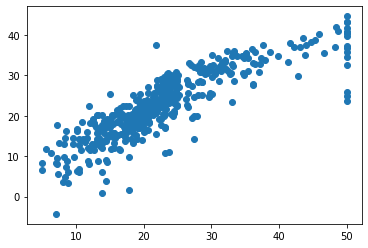

In [24]:
plt.scatter(y, pred_y)

* **With Pipeline**

* **Import libraries & load dataset from sklearn**

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

* Defining X & y

In [26]:
X,y = load_boston(return_X_y=True)

* **Defining Pipeline**

In [27]:
pipe = Pipeline([('scaler:', StandardScaler()),('algo:', LinearRegression())])
pipe.fit(X,y)

Pipeline(steps=[('scaler:', StandardScaler()), ('algo:', LinearRegression())])

* Prediction & finding error

In [28]:
pred_y = pipe.predict(X)
print('Mean Squared Error is:' , mean_squared_error(y, pred_y))

Mean Squared Error is: 21.8948311817292


* Plotting the results

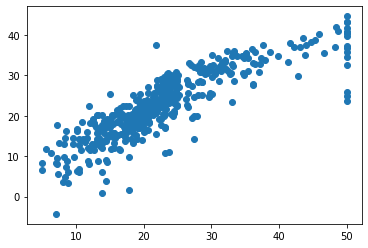

In [29]:
plt.scatter(y, pred_y)

* **Conclusions/Report**
  - While using **Pipeline** it is very easy and simple to write the code.
  - Use of **Pipeline** is very benificial & easy to understand as the readability of code is better in it than without using **Pipeline**.

* ***Assignment***
  - Use **Pipeline in KNN**

* **Solution**

* **Import libraries & load dataset from sklearn**

In [30]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

* **Splitting data**

In [31]:
X,y = load_boston(return_X_y=True)

* **Defining Pipeline**

In [32]:
pipe = Pipeline([('scaler:', StandardScaler()),('algo:', KNeighborsRegressor())])
pipe.fit(X,y)

Pipeline(steps=[('scaler:', StandardScaler()),
                ('algo:', KNeighborsRegressor())])

* Prediction & finding error

In [33]:
pred_y = pipe.predict(X)
print('Mean Squared Error is:' , mean_squared_error(y, pred_y))

Mean Squared Error is: 11.31846719367589


* Plotting the results

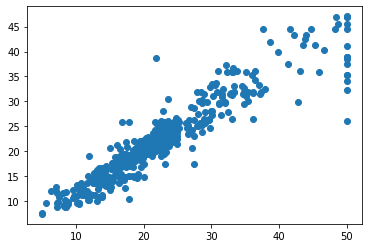

In [34]:
plt.scatter(y, pred_y)

# ***Day-2***

* **Assignments 12/12/2022**
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - Root Mean Squared Logarithmic Error (RMSLE)
  - R Squared (R^2)
  - Adjusted R Squared (R^2)
  - Write down what is the difference between these accuracy matrices and why and when we have to use them, why one is the better or worse then the other one.
  - Also provide their code.

## **Solutions**

#### **Mean Absolute Error (MAE)**
- MAE is the absolute difference between the target value and the value predicted by the model. 
- The MAE is more robust to outliers and does not penalize the errors as extremely as MSE.
- MAE is a linear score which means all the individual differences are weighted equally.
- It is not suitable for applications where you want to pay more attention to the outliers.

#### **Code:**

In [1]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("1st Example MAE is:", mean_absolute_error(y_true, y_pred))
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print("2nd Example MAE is:", mean_absolute_error(y_true, y_pred))

1st Example MAE is: 0.5
2nd Example MAE is: 0.75


#### **Mean Squared Error (MSE)**
- MSE or Mean Squared Error is one of the most preferred metrics for regression tasks.
- It is simply the average of the squared difference between the target value and the value predicted by the regression model.
- As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is.
- It is preferred more than other metrics because it is differentiable and hence can be optimized better.
#### Disadvantage of MSE:

- If we make a single very bad prediction, taking the square will make the error even worse and
    - it may skew the metric towards overestimating the model’s badness.

- That is a particularly problematic behaviour if we have noisy data (data that for whatever reason is not entirely reliable) 
- On the other hand, if all the errors are smaller than 1, than it affects in the opposite direction: we may underestimate the model’s badness.

#### **Code:**

In [2]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("1st Example MSE is:", mean_squared_error(y_true, y_pred))
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print("1st Example MSE is:", mean_squared_error(y_true, y_pred))

1st Example MSE is: 0.375
1st Example MSE is: 0.7083333333333334


#### **Root Mean Squared Error (RMSE)**
- RMSE is the most widely used metric for regression tasks and is the square root of the averaged squared difference between the target value and the value predicted by the model.
- It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors.
- This implies that RMSE is useful when large errors are undesired.

#### **Code:**

In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
rms = sqrt(mean_squared_error(y_true, y_pred))
print("Mean Squared Error is", mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error is ", rms)

Mean Squared Error is 0.375
Root Mean Squared Error is  0.6123724356957945


#### **Root Mean Squared Logarithmic Error (RMSLE)**
- It is the Root Mean Squared Error of the log-transformed predicted and log-transformed actual values.
- RMSLE adds 1 to both actual and predicted values before taking the natural logarithm to avoid taking the natural log of possible 0 (zero) values.
- As a result, the function can be used if actual or predicted have zero-valued elements. But this function is not appropriate if either is negative valued.
####  RMSLE is preferable when

- Targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc
- We care about percentage errors rather than the absolute value of errors.
- There is a wide range in the target variables and
- We don’t want to penalize big differences when both the predicted and the actual are big numbers.
- We want to penalize under estimates more than over estimates.


- **Let's imagine two cases of predictions**,

    **Case-1**: our model makes a prediction of 30 when the actual number is 40
    **Case-2**: our model makes a prediction of 300 when the actual number is 400
    - With RMSE the second result is scored as 10 times more than the first result
    - Conversely, with RMSLogE two results are scored the same.
    - RMSLogE takes into account just the ratio of change

- Lets have a look at the below example

    **Case-3**:
    - Prediction = 600, Actual = 1000 (the absolute difference is 400)
    - RMSE = 400,
    - RMSLogE = 0.5108

    **Case-4**:
    - Prediction = 1400, Actual = 1000 (the absolute difference is 400)
    - RMSE = 400,
    - RMSLogE = 0.3365

- When the differences are the same between actual and predicted in both cases.
    - RMSE treated them equally, however
    - RMSLogE penalized the under estimate more than over estimate (under estimated prediction score is higher than over estimated prediction score)

- Often, penalizing the under estimate more than over estimate is important for prediction of sales and inventory demands.
- To some extent having extra inventory or supply might be more preferable to not being able to providing product as much as the demand.

#### **Code:**

In [4]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
print("Mean Squared Log Error is:", mean_squared_log_error(y_true, y_pred))
rmsle = sqrt(mean_squared_log_error(y_true, y_pred))
print("Root Mean Squared Log Error is:", rmsle)

Mean Squared Log Error is: 0.03973012298459379
Root Mean Squared Log Error is: 0.19932416558108


#### **R Squared (R^2)**:
- Coefficient of Determination or R^2 is another metric used for evaluating the performance of a regression model.
- The metric helps us to compare our current model with a constant baseline and tells us how much our model is better.
- The constant baseline is chosen by taking the mean of the data and drawing a line at the mean.
- R^2 is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R^2 will always be less than or equal to 1.

#### **Code:**

In [5]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("R^2 Score is:", r2_score(y_true, y_pred))
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print("Variance_Weighted R^2 Score is:",r2_score(y_true, y_pred, multioutput='variance_weighted'))
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print("Uniform Avg. R^2 Score is:", r2_score(y_true, y_pred, multioutput='uniform_average'))
print("Raw_Values R^2 Score is:", r2_score(y_true, y_pred, multioutput='raw_values'))

R^2 Score is: 0.9486081370449679
Variance_Weighted R^2 Score is: 0.9382566585956417
Uniform Avg. R^2 Score is: 0.9368005266622779
Raw_Values R^2 Score is: [0.96543779 0.90816327]


#### **Adjusted R Squared (R^2)**:
- Adjusted R^2 depicts the same meaning as R^2 but is an improvement of it.
- R^2 suffers from the problem that the scores improve on increasing terms even though the model is not improving which may misguide the researcher.
- Adjusted R^2 is always lower than R^2 as it adjusts for the increasing predictors and only shows improvement if there is a real improvement.

## ***Video-1***
## **Preprocessing**

### **Import libraries & load dataset from sklearn**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

### **Importing data**

In [7]:
df = pd.read_csv('D:/Python_Ka_Chilla_Data/Data_Sets/drawndata1.csv')
df.sample(5)

,x,y,z
199,2089.221648,329.063383,b
14,275.937636,220.157137,a
230,2540.236772,230.940631,b
138,1443.491451,310.472993,b
150,1352.892266,201.182500,b


#### **Defining X & y**

In [8]:
X = df[['x','y']]
y = df['z'] == 'a'

#### **Plotting a scatter plot**

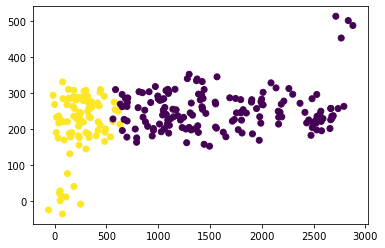

In [9]:
plt.scatter(X['x'],X['y'], c=y)

#### **Fitting a Model for scaling**
#### ***StandardScaler***

In [10]:
scaled_X = StandardScaler().fit_transform(X)

#### **Again Plot a scatter plot**

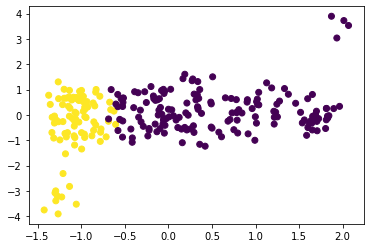

In [11]:
plt.scatter(scaled_X[:,0],scaled_X[:,1], c=y)

- **No difference even after scaling the features with StandardScaler because Assumption for StandardScaler is that the data should be normal(without outliers) but the range of values are shrinked from -1.5 to 2.0 on x-axis and -4 to +4 on y-axis**

#### ***MinMaxScaler***
- This method is used for non_Gaussian data.

In [12]:
scaled_X1 = MinMaxScaler().fit_transform(X)

#### **Again Plot a scatter plot**

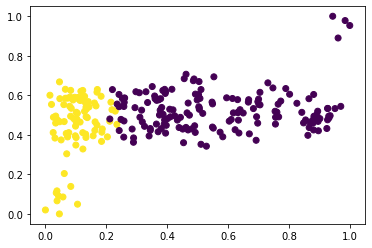

In [13]:
plt.scatter(scaled_X1[:,0],scaled_X1[:,1], c=y)

- **As we can see that outliers are still present but their effect lowers down as the range of values are shrinked from 0.0 to 1.0 on x-axis and 0.0 to 1.0 on y-axis**

#### ***QuantileTransformer***
- This Method is used to remove outliers

In [14]:
scaled_X2 = QuantileTransformer().fit_transform(X)

#### **Again Plot a scatter plot**

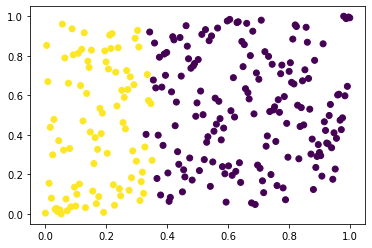

In [15]:
plt.scatter(scaled_X2[:,0],scaled_X2[:,1],c=y)

### ***Conclusions/Report***
- For a Normally distributed(Gaussian distribution) data we have to use **StandardScaler( )** for preprocessing tha data.
- For a Non-Normally distributed(Non-Gaussian distribution) data we have to use **MinMaxScaler( )** for preprocessing the data.
- To remove outliers from the data (To minimize the effect of outliers) we have to use **QuantileTransforme( )** for preprocessing tha data.

## ***Video-2***
## **Preprocessing & Logistic Regression**

### **Import libraries**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [17]:
df = pd.read_csv('D:/Python_Ka_Chilla_Data/Data_Sets/drawndata2.csv')
df.sample(10)

,x,y,z
161,146.831123,441.314909,b
54,435.143006,312.166244,a
78,534.260582,418.003327,a
174,490.381305,72.108060,b
61,208.633180,157.025819,a
81,495.887147,316.538840,a
60,211.676419,245.867992,a
4,405.425622,403.141546,a
122,129.602163,344.899971,b
30,257.299558,152.768291,a


#### **Defining X & y**

In [18]:
X = df[['x','y']]
y = df['z']=='a'

#### **Plotting a Scatter Plot**

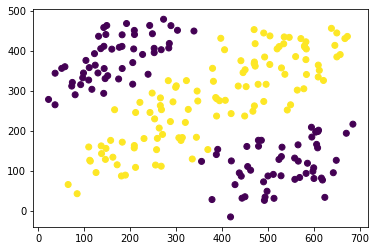

In [19]:
plt.scatter(X['x'],X['y'],c=y)

#### **Make a Pipeline**

In [20]:
pipe = Pipeline([
                ('scaler:', QuantileTransformer()),
                ('algo:', LogisticRegression())
                ])
pipe.fit(X,y)

Pipeline(steps=[('scaler:', QuantileTransformer()),
                ('algo:', LogisticRegression())])

#### **Predictions**

In [21]:
y_pred = pipe.predict(X)

#### **Again Plotting a Scatter Plot**

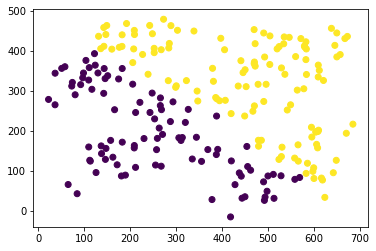

In [22]:
plt.scatter(X['x'],X['y'],c=y_pred)

- **As the graph illustrate that the results are not good. Why? Because QuantileTransformer is used for removal of outliers. As our data is non linear so it is best for us to use polynomialFeatures**

##### **Import:**

In [23]:
from sklearn.preprocessing import PolynomialFeatures

#### **Redesign Pipeline, Prediction & Plotting**

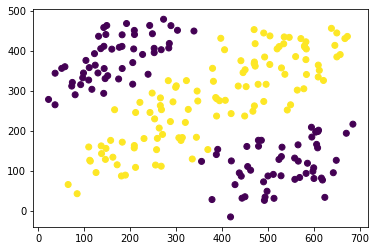

In [24]:
pipe = Pipeline([
                ('scaler:', PolynomialFeatures()),
                ('algo:', LogisticRegression())
                ])
pipe.fit(X,y)
y_pred = pipe.predict(X)
plt.scatter(X['x'],X['y'],c=y_pred)

- **Now as we can see that the above predictions are absolutely near to original ones.**

### ***Conclusions/Report***
- For a Non-Linear data we have to use **PolynomialFeatures( )** for preprocessing tha data.

## ***Video-3 & 4***
## **Preprocessing & Logistic Regression**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

##### Load dataset

In [26]:
df = pd.read_csv('D:/Python_Ka_Chilla_Data/Data_Sets/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244889,152530.0,2.078058,0.177910,-1.764442,0.366976,0.567832,-0.690985,0.198241,-0.225893,0.435156,...,-0.364376,-0.914351,0.320642,0.331798,-0.235797,0.185505,-0.056782,-0.031709,1.79,0
219260,141657.0,-0.225352,1.131577,-0.849430,-0.498963,0.549712,-0.876153,0.520793,0.398865,-0.009605,...,-0.314595,-0.977657,0.165044,0.435977,-0.424545,0.125256,0.087291,0.011201,8.99,0
6866,8748.0,-2.023677,-2.097347,1.031102,-2.615778,0.766715,-0.966419,0.132164,0.000585,0.639232,...,-0.187299,-0.537387,0.423556,-0.371819,0.798133,-0.018351,-0.119879,0.071554,237.09,0
139831,83382.0,-0.253438,1.299899,0.728264,0.681057,0.488775,-1.112377,1.116091,-0.212808,-0.729473,...,-0.012971,-0.047019,-0.230979,0.282767,0.294236,-0.397832,0.038078,0.047503,16.35,0
199425,132958.0,2.014215,0.241235,-2.225133,0.926951,0.329602,-1.366816,0.171818,-0.252480,0.865625,...,-0.025188,0.217465,-0.038945,-0.247016,0.166630,0.736636,-0.040233,-0.014612,12.31,0


##### Shape of the data

In [27]:
df.shape

(284807, 31)

##### Defining X & Y variables

In [28]:
X = df.drop(columns=['Class','Time','Amount'])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [29]:
y = df.iloc[:,-1:]
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


##### Value Count & their sum of y labels

In [30]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [31]:
y.sum()

Class    492
dtype: int64

##### Fitting the model & get predictions

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(X,y)

LogisticRegression()

In [34]:
y_pred = lr.predict(X)

In [35]:
y_pred.sum()

348

- Predicted 348 instead of 492 (Actual) because the data is highly imbalanced

**Solution**
- As there is low data on ones(492) and high data on zeros(284315). So best way is to make better predictions we have to increase the weight of ones

##### Fitting again with weight

In [36]:
lr = LogisticRegression(class_weight={0:1,1:2})

In [37]:
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [38]:
y_pred = lr.predict(X)

In [39]:
y_pred.sum()

437

- We can see that prediction is much better now as enhanced from 348 to 437. But how could we find that how much weight is needed for best predictions?
- To solve this we have to use grid search cv

##### **Use of GridSearchCV in model**

In [40]:
grid = GridSearchCV(
            estimator = LogisticRegression(),
            param_grid = {'class_weight':[{0:1,1:number}for number in range(1,8)]},
            cv = 5
            )

In [41]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}]})

In [42]:
y_pred = grid.predict(X)

In [43]:
y_pred.sum()

476

##### Make DataFrame of the results

In [44]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.397923,0.237962,0.016192,0.004491,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998999,0.999315,0.998947,0.999298,0.999017,0.999115,0.000158,7
1,3.249344,0.385209,0.015790,0.003187,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999034,0.999421,0.999017,0.999298,0.999175,0.999189,0.000154,6
2,2.991490,0.131594,0.018790,0.007778,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999052,0.999491,0.998964,0.999421,0.999210,0.999228,0.000204,4
3,3.185780,0.533954,0.015391,0.002869,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.998999,0.999544,0.998982,0.999438,0.999280,0.999249,0.000227,1
4,2.808396,0.149335,0.016190,0.003653,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.998964,0.999526,0.999017,0.999438,0.999280,0.999245,0.000223,3
5,2.734237,0.268935,0.018591,0.003877,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.998964,0.999579,0.998982,0.999438,0.999280,0.999249,0.000244,1
6,2.593520,0.323892,0.017589,0.004671,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.998964,0.999596,0.998912,0.999473,0.999192,0.999228,0.000271,5


- We can see that best results for "class_weight" are {0: 1, 1: 4} and for {0: 1, 1: 6}.
- Now we will check precision, recall and accuracy score & confusion matrix of our model

##### Determination the score of our model

In [45]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report

In [46]:
print("Precision Score of our model is:", precision_score(y, y_pred))
print("Recall Score of our model is:", recall_score(y, y_pred))
print("F1 Score of our model is:", f1_score(y, y_pred))
print("Accuracy Score of our model is:", accuracy_score(y, y_pred))

Precision Score of our model is: 0.8109243697478992
Recall Score of our model is: 0.7845528455284553
F1 Score of our model is: 0.7975206611570248
Accuracy Score of our model is: 0.9993118146674765


In [47]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.81      0.78      0.80       492

    accuracy                           1.00    284807
   macro avg       0.91      0.89      0.90    284807
weighted avg       1.00      1.00      1.00    284807



In [48]:
confusion_matrix(y, y_pred)

array([[284225,     90],
       [   106,    386]], dtype=int64)

##### Plotting the confusion_matrix

<AxesSubplot:>

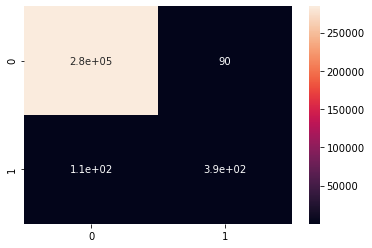

In [49]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True)

# ***Day-3***

## ***Preprocessing*** **13122022**

### ***Video-5***
- **Use of GridSearchCV for Precision & Recall Score**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

##### Load dataset

In [51]:
df = pd.read_csv('D:/Python_Ka_Chilla_Data/Data_Sets/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152573,97412.0,1.947627,-0.539026,0.114215,0.377093,-0.853750,0.062642,-1.126314,0.151276,2.541178,...,-0.094555,0.050797,0.273681,-0.458934,-0.625703,0.449144,-0.048944,-0.058586,15.95,0
56042,47249.0,1.469575,-1.047791,0.601307,-1.527461,-1.478949,-0.393460,-1.159979,-0.024832,-2.019023,...,-0.331521,-0.640036,0.117472,-0.034579,0.151974,-0.409133,0.039265,0.018168,20.00,0
200625,133508.0,-1.212784,0.831906,0.852658,-0.913950,0.273880,1.547417,-0.278771,0.991576,0.425874,...,0.350141,1.105877,-0.104929,-0.300678,-0.294482,0.679205,-0.001885,0.122925,22.13,0
265045,161708.0,-1.151451,0.394565,0.613572,-2.741782,0.271257,-1.128085,1.100119,-0.214330,-1.373959,...,0.187202,0.437761,-0.574602,0.083664,1.226611,-0.127855,-0.093555,0.091951,39.90,0
207945,136901.0,-1.134007,0.844539,1.096453,0.879468,0.019916,0.139610,-0.203267,0.519672,-0.133442,...,0.333386,0.813342,-0.127665,0.648863,-0.025025,-0.419236,-0.204766,0.127980,10.80,0


##### Shape of the data

In [52]:
df.shape

(284807, 31)

##### Defining X & Y variables

In [53]:
X = df.drop(columns=['Class','Time','Amount'])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [54]:
y = df.iloc[:,-1:]
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


##### Value Count & their sum of y labels

In [55]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
y.sum()

Class    492
dtype: int64

##### Fitting the model & get predictions

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X,y)

LogisticRegression()

In [59]:
y_pred = lr.predict(X)

In [60]:
y_pred.sum()

348

- Predicted 348 instead of 492 (Actual) because the data is highly imbalanced

**Solution**
- As there is low data on ones(492) and high data on zeros(284315). So best way is to make better predictions we have to increase the weight of ones

##### Fitting again with weight

In [61]:
lr = LogisticRegression(class_weight={0:1,1:2})

In [62]:
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [63]:
y_pred = lr.predict(X)

In [64]:
y_pred.sum()

437

- We can see that prediction is much better now as enhanced from 348 to 437. But how could we find that how much weight is needed for best predictions?
- To solve this we have to use grid search cv

##### Use of GridSearchCV in model

In [66]:
grid = GridSearchCV(
            estimator = LogisticRegression(),
            param_grid = {'class_weight':[{0:1,1:number}for number in range(1,8)]},
            cv = 5
            )

In [67]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}]})

In [68]:
y_pred = grid.predict(X)

In [69]:
y_pred.sum()

476

##### Make DataFrame of the results

In [70]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.393661,0.240087,0.015996,0.004430,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998999,0.999315,0.998947,0.999298,0.999017,0.999115,0.000158,7
1,3.339294,0.485957,0.017989,0.004814,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999034,0.999421,0.999017,0.999298,0.999175,0.999189,0.000154,6
2,3.004683,0.243747,0.016191,0.003308,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999052,0.999491,0.998964,0.999421,0.999210,0.999228,0.000204,4
3,2.701858,0.225707,0.015390,0.005002,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.998999,0.999544,0.998982,0.999438,0.999280,0.999249,0.000227,1
4,2.722644,0.251831,0.015591,0.001624,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.998964,0.999526,0.999017,0.999438,0.999280,0.999245,0.000223,3
5,2.802400,0.410042,0.017991,0.004775,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.998964,0.999579,0.998982,0.999438,0.999280,0.999249,0.000244,1
6,2.756023,0.291228,0.014591,0.003381,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.998964,0.999596,0.998912,0.999473,0.999192,0.999228,0.000271,5


- We can see that best results for "class_weight" are {0: 1, 1: 4} and for {0: 1, 1: 6}.
- Now we will check precision, recall and accuracy score & confusion matrix of our model

##### Determination the score of our model

In [71]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report

In [72]:
print("Precision Score of our model is:", precision_score(y, y_pred))
print("Recall Score of our model is:", recall_score(y, y_pred))
print("F1 Score of our model is:", f1_score(y, y_pred))
print("Accuracy Score of our model is:", accuracy_score(y, y_pred))

Precision Score of our model is: 0.8109243697478992
Recall Score of our model is: 0.7845528455284553
F1 Score of our model is: 0.7975206611570248
Accuracy Score of our model is: 0.9993118146674765


In [73]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.81      0.78      0.80       492

    accuracy                           1.00    284807
   macro avg       0.91      0.89      0.90    284807
weighted avg       1.00      1.00      1.00    284807



In [74]:
confusion_matrix(y, y_pred)

array([[284225,     90],
       [   106,    386]], dtype=int64)

##### Plotting the confusion_matrix

<AxesSubplot:>

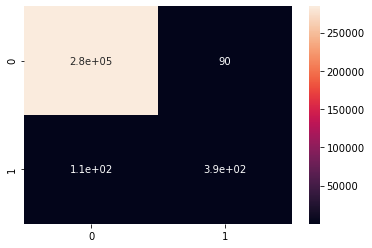

In [75]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True)

#### **Import make_scorer & make GridSearchCV**

In [76]:
from sklearn.metrics import make_scorer

In [77]:
grid = GridSearchCV(
            estimator = LogisticRegression(),
            param_grid = {'class_weight':[{0:1,1:number}for number in range(1,10)]},
            cv = 5,
            scoring={"precision":make_scorer(precision_score),"recall":make_scorer(recall_score)},
            refit="precision"
            )

#### **Fitting & Predictions of the model**

In [78]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='precision',
             scoring={'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [79]:
y_pred = grid.predict(X)

#### **Make DataFrame of the results**

In [80]:
df_results = pd.DataFrame(grid.cv_results_)

In [81]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,3.048460,0.280356,0.055166,0.001937,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.694444,0.968750,0.913043,0.881579,...,0.092222,1,0.757576,0.626263,0.428571,0.683673,0.500000,0.599217,0.119921,9
1,2.807996,0.328879,0.067161,0.006396,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.700000,0.971429,0.818182,0.815217,...,0.086752,2,0.777778,0.686869,0.551020,0.765306,0.632653,0.682725,0.084528,8
2,2.775616,0.085781,0.058965,0.004512,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.695652,0.960526,0.729412,0.828283,...,0.092564,3,0.808081,0.737374,0.632653,0.836735,0.683673,0.739703,0.075756,7
3,2.647888,0.080719,0.061966,0.008505,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.677966,0.962025,0.717391,0.830000,...,0.100011,4,0.808081,0.767677,0.673469,0.846939,0.724490,0.764131,0.060979,6
4,2.519563,0.125255,0.063164,0.001719,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.666667,0.950000,0.718750,0.830000,...,0.099020,5,0.808081,0.767677,0.704082,0.846939,0.724490,0.770254,0.052519,5
5,2.499371,0.157053,0.066956,0.005757,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.666667,0.951807,0.704082,0.823529,...,0.101738,6,0.808081,0.797980,0.704082,0.857143,0.724490,0.778355,0.056381,4
6,2.472388,0.150154,0.062563,0.006942,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.666667,0.952381,0.676471,0.833333,...,0.105961,7,0.808081,0.808081,0.704082,0.867347,0.724490,0.782416,0.060037,3
7,2.341264,0.098602,0.062564,0.006083,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.658333,0.954023,0.650943,0.817308,...,0.112134,8,0.797980,0.838384,0.704082,0.867347,0.734694,0.788497,0.061346,2
8,2.362052,0.149681,0.054368,0.003772,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.647541,0.954023,0.610619,0.787037,...,0.121058,9,0.797980,0.838384,0.704082,0.867347,0.755102,0.792579,0.058230,1


#### **Make the Plot of precision & recall scores.**

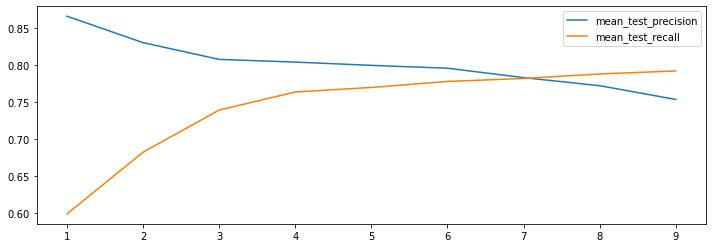

In [82]:
plt.figure(figsize=(12,4))
for i in ["mean_test_precision", "mean_test_recall"]:
    plt.plot([j[1] for j in df_results["param_class_weight"]],
    df_results[i],
    label = i)
plt.legend()

### ***Video-6***
* **Make a function to calculate minimum_of_both precision_score & recall_score**

In [83]:
def min_precision_recall(y, y_pred):
    p = precision_score(y, y_pred)
    r = recall_score(y, y_pred)
    return min(p, r)
make_scorer(min_precision_recall, greater_is_better=False)

make_scorer(min_precision_recall, greater_is_better=False)

#### **Make GridSearchCV & fitting the Model**

In [84]:
grid = GridSearchCV(
            estimator = LogisticRegression(),
            param_grid = {'class_weight':[{0:1,1:number}for number in range(1,10)]},
            cv = 5,
            scoring={"precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
                     "minimum_of_both":make_scorer(min_precision_recall)},
            refit="minimum_of_both"
            )

In [85]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='minimum_of_both',
             scoring={'minimum_of_both': make_scorer(min_precision_recall),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

#### **Make Predictions**

In [86]:
y_pred = grid.predict(X)

#### **Make DataFrame of Results**

In [87]:
df_results = pd.DataFrame(grid.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_recall,rank_test_recall,split0_test_minimum_of_both,split1_test_minimum_of_both,split2_test_minimum_of_both,split3_test_minimum_of_both,split4_test_minimum_of_both,mean_test_minimum_of_both,std_test_minimum_of_both,rank_test_minimum_of_both
0,3.227559,0.338547,0.124926,0.036916,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.694444,0.968750,0.913043,0.881579,...,0.119921,9,0.694444,0.626263,0.428571,0.683673,0.500000,0.586590,0.104976,9
1,3.147801,0.247341,0.123332,0.006464,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.700000,0.971429,0.818182,0.815217,...,0.084528,8,0.700000,0.686869,0.551020,0.765306,0.632653,0.667170,0.071803,8
2,3.173189,0.403200,0.118731,0.018894,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.695652,0.960526,0.729412,0.828283,...,0.075756,7,0.695652,0.737374,0.632653,0.828283,0.683673,0.715527,0.065527,7
3,2.995487,0.297258,0.127128,0.016379,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.677966,0.962025,0.717391,0.830000,...,0.060979,6,0.677966,0.767677,0.673469,0.830000,0.724490,0.734720,0.058723,5
4,3.040062,0.523943,0.129527,0.032933,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.666667,0.950000,0.718750,0.830000,...,0.052519,5,0.666667,0.767677,0.704082,0.830000,0.724490,0.738583,0.056151,4
5,2.570928,0.222005,0.116333,0.006434,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.666667,0.951807,0.704082,0.823529,...,0.056381,4,0.666667,0.797980,0.704082,0.823529,0.724490,0.743349,0.058637,1
6,2.837779,0.228005,0.109539,0.011734,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.666667,0.952381,0.676471,0.833333,...,0.060037,3,0.666667,0.808081,0.676471,0.833333,0.724490,0.741808,0.067800,2
7,2.385837,0.088467,0.115534,0.019703,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.658333,0.954023,0.650943,0.817308,...,0.061346,2,0.658333,0.838384,0.650943,0.817308,0.734694,0.739932,0.077826,3
8,2.598316,0.216002,0.121329,0.010831,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.647541,0.954023,0.610619,0.787037,...,0.058230,1,0.647541,0.838384,0.610619,0.787037,0.755102,0.727737,0.085622,6


#### **Plotting the minimum_of_both**

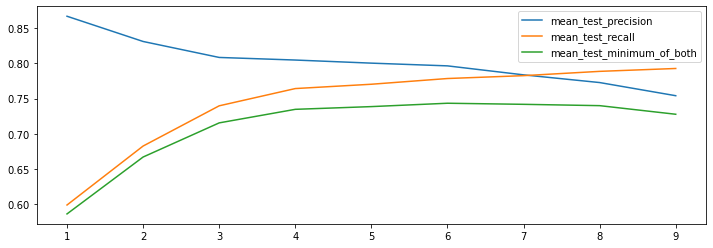

In [88]:
plt.figure(figsize=(12,4))
for i in ["mean_test_precision", "mean_test_recall", "mean_test_minimum_of_both"]:
    plt.plot([j[1] for j in df_results["param_class_weight"]],
    df_results[i],
    label = i)
plt.legend()

### ***Video-7***
- How make_scorrer works?

In [89]:
dumy = make_scorer(min_precision_recall)

In [90]:
dumy

make_scorer(min_precision_recall)

Signature:      **dumy(estimator, X, y_true, sample_weight=None)**
- Here we can see that make_scorer function got **estimator, X, y_true and sample_weight=None**.
- From where it got all these parameters even we do not assigned to it?
- Actually as we use **make_scorer** inside the **GridSearchCV** so it automatically read all these parameters.

#### Define a new function in place of the make_scorer( )

In [91]:
def min_precision_recall(estimator, X, y_true, sample_weight=None):
    y_pred = estimator.predict(X)
    p = precision_score(y, y_pred)
    r = recall_score(y, y_pred)
    return min(p, r)
grid = GridSearchCV(
            estimator = LogisticRegression(),
            param_grid = {'class_weight':[{0:1,1:number}for number in range(1,10)]},
            cv = 5,
            scoring={"precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
                     "minimum_of_both":min_precision_recall},
            refit="minimum_of_both"
            )

- As we can see here that we refit the **"minimum_of_both"** without using **make_scorer( )** function.

In [92]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='minimum_of_both',
             scoring={'minimum_of_both': <function min_precision_recall at 0x000001D0848D3310>,
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

# ***Day-4*** - **14122022**

## ***Meta_Estimator_Voting_Classifier***

### ***Video-1***
* **Voting = hard**
- **Import Libraries**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

- **Make dataset & plot a scatter plot**

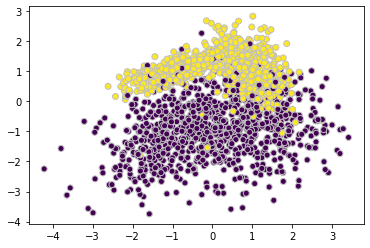

In [94]:
X,y = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state= 21)
plt.scatter(x=X[:,0],y=X[:,1],c=y, edgecolor="silver")

- **Apply Classifiers & Fitting**

In [95]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier().fit(X,y)
clf3 = DecisionTreeClassifier().fit(X,y)

- **Make Prediction & Check Accuracy**

In [96]:
clf1.predict(X)
print("Accuracy of LogisticRegression is:", clf1.score(X,y))
clf2.predict(X)
print("Accuracy of KNeighborsClassifier is:", clf2.score(X,y))
clf3.predict(X)
print("Accuracy of DecisionTreeClassifier is:", clf3.score(X,y))

Accuracy of LogisticRegression is: 0.9065
Accuracy of KNeighborsClassifier is: 0.9325
Accuracy of DecisionTreeClassifier is: 1.0


- **Apply VotingClassifier**

In [97]:
clf4 = VotingClassifier(
                        estimators= [("lr:",clf1),
                                     ("KNN:",clf2),
                                     ("DT:",clf3)],
                        voting="hard"
                        )

* **Fit, Prediction & Accuracy of VotingClassifier**

In [98]:
clf4.fit(X,y)
clf4.predict(X)
print("Accuracy of VotingClassifier is:", clf4.score(X,y))

Accuracy of VotingClassifier is: 0.9435


### ***Video-2***
* **Voting = soft**
* **Apply VotingClassifier**

In [99]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier().fit(X,y)
clf3 = VotingClassifier(
                        estimators= [("lr:",clf1),
                                     ("KNN:",clf2)],
                        voting="soft",
                        weights=[1,4]
                        ).fit(X,y)

* **Predictions & Scores of the Models**

In [100]:
clf1.predict(X)
print("Accuracy of LogisticRegression is:", clf1.score(X,y))
clf2.predict(X)
print("Accuracy of KNeighborsClassifier is:", clf2.score(X,y))
clf3.predict(X)
print("Accuracy of VotingClassifier is:", clf3.score(X,y))

Accuracy of LogisticRegression is: 0.9065
Accuracy of KNeighborsClassifier is: 0.9325
Accuracy of VotingClassifier is: 0.9325


* **Predict Probability of Models**

In [101]:
print("Predict_Proba of VotingClassifier is:", clf3.predict_proba(X))
print("Predict_Proba KNeighborsClassifier is:", clf2.predict_proba(X))
print("Predict_Proba LogisticRegression is:", clf1.predict_proba(X))

Predict_Proba of VotingClassifier is: [[9.99944243e-01 5.57569834e-05]
 [1.56089104e-02 9.84391090e-01]
 [2.05044021e-02 9.79495598e-01]
 ...
 [1.74696433e-01 8.25303567e-01]
 [9.99633969e-01 3.66030643e-04]
 [9.98532704e-01 1.46729574e-03]]
Predict_Proba KNeighborsClassifier is: [[1.  0. ]
 [0.  1. ]
 [0.  1. ]
 ...
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]]
Predict_Proba LogisticRegression is: [[9.99721215e-01 2.78784917e-04]
 [7.80445522e-02 9.21955448e-01]
 [1.02522010e-01 8.97477990e-01]
 ...
 [7.34821656e-02 9.26517834e-01]
 [9.98169847e-01 1.83015322e-03]
 [9.92663521e-01 7.33647870e-03]]


* **Make Plots with predict_proba of Models**

In [102]:
def make_plots():
    plt.figure(figsize=(16,4))
    plt.subplot(141)
    plt.scatter(X[:,0],X[:,1],c=y,s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X[:,0],X[:,1],c=clf1.predict_proba(X)[:,1],s=10)
    plt.title("Logistic Regression")
    plt.subplot(143)
    plt.scatter(X[:,0],X[:,1],c=clf2.predict_proba(X)[:,1],s=10)
    plt.title("KNN")
    plt.subplot(144)
    plt.scatter(X[:,0],X[:,1],c=clf3.predict_proba(X)[:,1],s=10)
    plt.title("Voting Classifier")

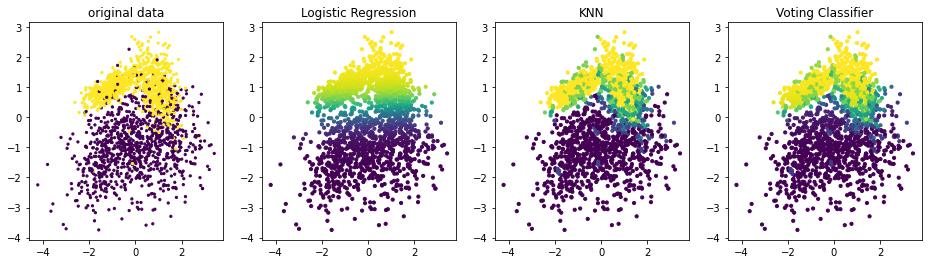

In [103]:
make_plots()

## ***Meta_Estimator in sk_lego Threshold***

### ***Video-1***
* **sk_lego Threshold**
- **Import Libraries**

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklego.meta import Thresholder
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

- **Make dataset & plot a scatter plot**

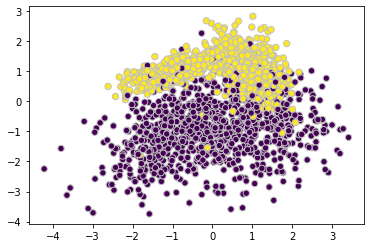

In [105]:
X,y = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state= 21)
plt.scatter(x=X[:,0],y=X[:,1],c=y, edgecolor="silver", s=40)

- **Make Threshold & Again Plot the Graph**

Text(0.5, 1.0, 'threshold=0.9')

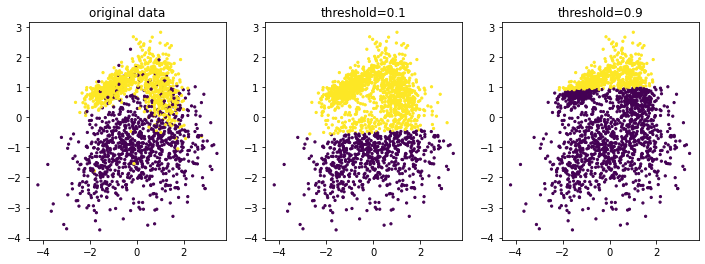

In [106]:
m1 = Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.1).fit(X,y)
m2 = Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.9).fit(X,y)


plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.title("original data")
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c=m1.predict(X),s=5)
plt.title("threshold=0.1")
plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=m2.predict(X),s=5)
plt.title("threshold=0.9")

- **Make Pipeline & GridSearchSV**

In [107]:
pipe = Pipeline([
    ("model", Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.1))
])

model = GridSearchCV(estimator=pipe,
                   param_grid= {"model__threshold":np.linspace(0.1, 0.9, 50)},
                   scoring={"Precision": make_scorer(precision_score),
                               "Recall": make_scorer(recall_score),
                               "Accuracy": make_scorer(accuracy_score)},
                   refit="Precision",
                   cv=5)

- **Fitting the Model**

In [108]:
model.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        Thresholder(model=LogisticRegression(),
                                                    threshold=0.1))]),
             param_grid={'model__threshold': array([0.1       , 0.11632653, 0.13265306, 0.14897959, 0.16530612,
       0.18163265, 0.19795918, 0.21428571, 0.23061224, 0.24693878,
       0.26326531, 0.27959184, 0.29591837, 0.3122449 , 0.32857143,
       0.34489796, 0.36122449, 0.37755102, 0.39387755, 0...
       0.58979592, 0.60612245, 0.62244898, 0.63877551, 0.65510204,
       0.67142857, 0.6877551 , 0.70408163, 0.72040816, 0.73673469,
       0.75306122, 0.76938776, 0.78571429, 0.80204082, 0.81836735,
       0.83469388, 0.85102041, 0.86734694, 0.88367347, 0.9       ])},
             refit='Precision',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'Precision': make_scorer(precision_score),
                      'Recall': make_scorer(

* **Make Prediction & DataFrame**

In [109]:
model.predict(X)
df_results = pd.DataFrame(model.cv_results_)

* **Plotting the results**

[]

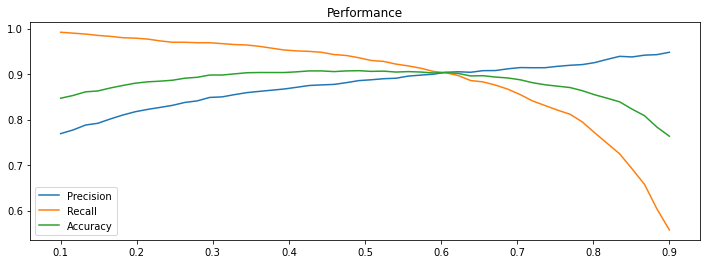

In [110]:
plt.figure(figsize=(12,4))
plt.plot(df_results["param_model__threshold"], df_results["mean_test_Precision"], label="Precision")
plt.plot(df_results["param_model__threshold"], df_results["mean_test_Recall"], label="Recall")
plt.plot(df_results["param_model__threshold"], df_results["mean_test_Accuracy"], label="Accuracy")
plt.legend()
plt.title("Performance")
plt.plot()

* **Here we can see that Score is maximum when Threshold is 0.6.**
* **So let's make another plot**

Text(0.5, 1.0, 'threshold=0.9')

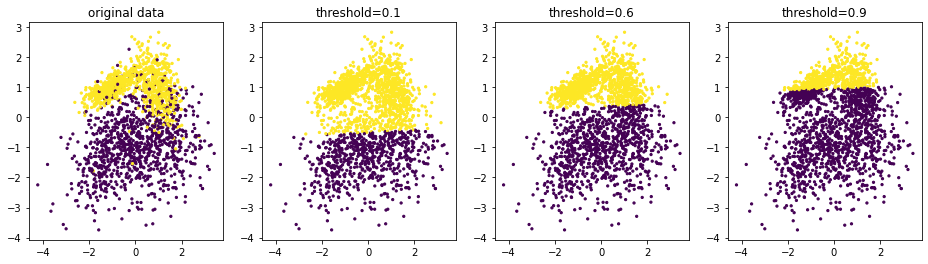

In [111]:
m1 = Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.1).fit(X,y)
m2 = Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.6).fit(X,y)
m3 = Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.9).fit(X,y)

plt.figure(figsize=(16,4))
plt.subplot(141)
plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.title("original data")
plt.subplot(142)
plt.scatter(X[:,0],X[:,1],c=m1.predict(X),s=5)
plt.title("threshold=0.1")
plt.subplot(143)
plt.scatter(X[:,0],X[:,1],c=m2.predict(X),s=5)
plt.title("threshold=0.6")
plt.subplot(144)
plt.scatter(X[:,0],X[:,1],c=m3.predict(X),s=5)
plt.title("threshold=0.9")

* **Have a look at fig 3. It is much more better than Others (Close to origional).**

# ***Day-5*** - **15122022**

## ***Group Predictions with Meta_Estimator***
### **Grouping Models**

### ***Video-1, 2, 3***
- **Import Libraries**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklego.datasets import load_chicken
from sklego.preprocessing import ColumnSelector
import warnings
warnings.filterwarnings('ignore')

- **Reading Dataset**

In [113]:
df = load_chicken(as_frame=True)
df.sample(10)

,weight,time,chick,diet
105,100,20,9,1
218,115,20,20,1
242,164,20,22,2
317,48,2,29,2
164,248,18,14,1
320,87,8,29,2
165,259,20,14,1
106,98,21,9,1
19,138,14,2,1
352,41,0,32,3


In [114]:
df['diet'].unique()

array([1, 2, 3, 4], dtype=int64)

- **Feature Pipeline & Plotting**

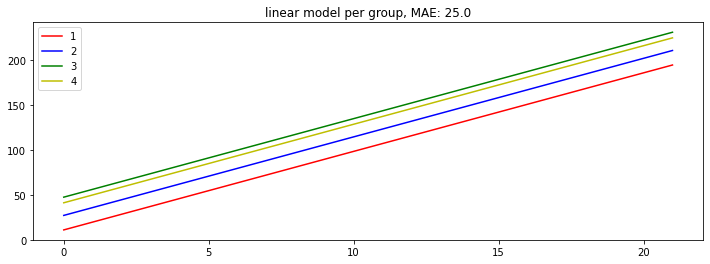

In [115]:
feature_pipeline = Pipeline([
    ("datagrab", FeatureUnion([
        ("discrete", Pipeline([
            ("grab", ColumnSelector("diet")),   
            ("encode", OneHotEncoder())
        ])),
        ("continuous", Pipeline([
            ("grab", ColumnSelector("time")),
            ("standardize", StandardScaler())
        ]))
    ]))
])
pipe = Pipeline([
    ("transform", feature_pipeline),
    ("model", LinearRegression())
])
def plot_model(model):
    df = load_chicken(as_frame=True)
    model.fit(df[['diet', 'time']],df['weight'])
    metric_df = df[['diet', 'time', 'weight']].assign(pred=lambda df:model.predict(df[['diet', 'time']]))
    metric = mean_absolute_error(metric_df['weight'], metric_df['pred'])
    plt.figure(figsize=(12,4))
    for i in [1,2,3,4]:
        pltr = metric_df[['time','diet','pred']].drop_duplicates().loc[lambda df: df['diet']==i]
        plt.plot(pltr['time'], pltr['pred'], color = '.rbgy'[i], label = i)
    plt.legend()
    plt.title(f"linear model per group, MAE: {np.round(metric, 2)}")
plot_model(pipe)

#### **Report**
* As the column 'diet' is discrete variable, so we make a separate pipeline for it.
* And the column 'time' is a continuous variable, so we make another separate pipeline for it.
* And then we combine both these pipelines with the function **FeatureUnion**.
* To select each of the above colummn separately we use the function **ColumnSelector**.
* Then we pass both these pipelines in a big **Pipeline**.
* For fitting the model we def a new function **plot_model( )**.
* We want to predict the **weight** of chicken on the basis of **diet & time**. So we fit accordingly.
* After fitting the model we make a new dataframe named **metric_df** in which we keep 3 series from df (diet, time & weight) while we assign a new series to it named **pred**. To do so we use **lambda** function which return the values of **predictions** on the basis of df[diet, time] in the new series **pred**.
* Then we make another variable **metric** to check the **MAE** between **Actual weight** & **Predicted weight**.
* In the last we make a for loop to plot the results on the basis of four different kinds of diet.

#### ***All of the above groupping can be done by GroupedPredictor( ) function of sklego***

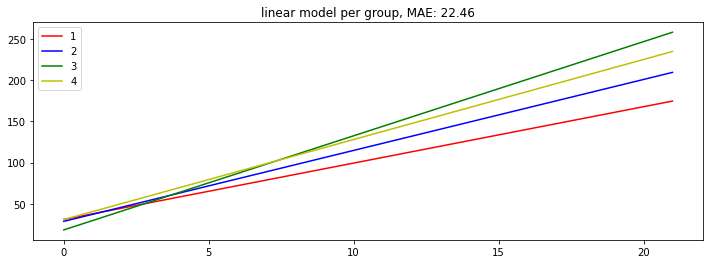

In [116]:
from sklego.meta import GroupedPredictor
mod = GroupedPredictor(LinearRegression(), groups=["diet"])
plot_model(mod)

* The above graph illustrates that the MAE of **GroupedPredictor( )** is less than that of above described function.
* Hence **GroupedPredictor( )** is much Accurate.

## ***Zero Inflatted Regression***

### ***Video-4***
- **Import Libraries**

In [117]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklego.meta import ZeroInflatedRegressor
import warnings
warnings.filterwarnings('ignore')

- **Make a Dataset**

In [123]:
df = (pd.DataFrame({'dt' : pd.date_range("2018-01-01", "2021-01-01")})
      .assign(x=lambda df: np.random.normal(0,1, df.shape[0]))
      .assign(weekend=lambda d: (df['dt'].dt.weekday >=5).astype(np.int16))
      .assign(y=lambda df: np.where(df['weekend'],0,1.5+0.87*df['x']+np.random.normal(0,0.2,df.shape[0]))))
#     # give 0 to weekends and random numbers to non weekends
df.head()

,dt,x,weekend,y
0,2018-01-01,0.260668,0,1.679397
1,2018-01-02,0.523434,0,1.889311
2,2018-01-03,-1.047070,0,0.595810
3,2018-01-04,0.269822,0,1.717267
4,2018-01-05,-0.371541,0,1.372691


* **Splitting Dataset**

In [124]:
X, y = df[['x', 'weekend']].values, df['y'].values

* **Apply ZeroInflattedRegressor( )**

In [125]:
zir = ZeroInflatedRegressor(
    classifier=LogisticRegression(),
    regressor=Ridge()
)
lr = Ridge(random_state=0)
print("Zir r2:", cross_val_score(zir,X,y).mean())
print("lr r2:", cross_val_score(lr,X,y).mean())

Zir r2: 0.9722863059822302
lr r2: 0.8108748483376174


### ***Report***
* **Zero-inflated models** are used when there is excess zero count in the data, meaning that there are more zero values than expected under the assumed distribution. In other words, the data is "inflated" with zero values.
* **Zero-inflated models** are often used in situations where the data has a large number of zero values, but there are also **non-zero values that follow a specific distribution**. In these cases, using a standard regression model **(such as a linear or logistic regression model)** may not be appropriate, because the excess zeros in the data can **bias** the results.
* **Zero-inflated models** are used when the **response variable (the dependent variable)** is a count that is heavily skewed towards zero, meaning that there are many more zeros than there are non-zero values. A zero-inflated model accounts for this excess of zeros by allowing for two separate processes that generate zeros: one process generates zero values because the response variable really is zero, and the other process generates zero values because there is some other factor that causes the response variable to be zero (e.g., a lack of data).
* The **ZeroInflatedRegressor( )** in the statsmodels package is a specific implementation of a zero-inflated model for regression problems, where the response variable is continuous. It is similar to a standard linear regression model, but it includes an additional parameter for the proportion of zero values that are generated by the excess zero process. This allows the model to better fit the data and make more accurate predictions for cases where there are a large number of zero values.
  
* **It is important to note that the *ZeroInflatedRegressor( )* should only be used when the response variable is a count that is heavily skewed towards zero, and not for other types of data. In addition, it is important to carefully consider the assumptions of the model and whether they are reasonable for the data being analyzed.**